In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import time
import os
import itertools
import matplotlib.pyplot as plt




class PrepareExperiment():
    def __init__(self, id, home="."):
        self.id = id
        self.home=home        
        self.expHome = None
        self.images = None
        self.plots = None
        self._prepare_foldiers()
    
    def _prepare_foldiers(self):
        dirname = self.unique_name(self.home + "/experiments/experiment",makedir=True)
        images = dirname+"/images"
        plots = dirname+"/plots"       
        os.makedirs(dirname)        
        os.makedirs(images)
        os.makedirs(plots)
        self.expHome = dirname+"/"
        self.images = images+"/"
        self.plots = plots+"/"
        
        

    @staticmethod
    def unique_name(basename, ext=None, makedir=False):
        c = itertools.count()
        if makedir:
            actualname = "%s" % basename
            while os.path.exists(actualname):
                actualname = "%s_%d" % (basename, next(c))
        else:
            actualname = "%s.%s" % (basename, ext)    
            while os.path.exists(actualname):
                actualname = "%s_%d.%s" % (basename, next(c),ext)
        return actualname     

env = PrepareExperiment(1)
print(env.images)
print(env.expHome)

d = pd.DataFrame({"a":[],"b":[]})
print(d)
b = pd.DataFrame({"a":[1],"b":[2]})
d = d.append(b)
print(d)
print(int(time.time()))


./experiments/experiment_15/images/
./experiments/experiment_15/
Empty DataFrame
Columns: [a, b]
Index: []
     a    b
0  1.0  2.0
1535762156


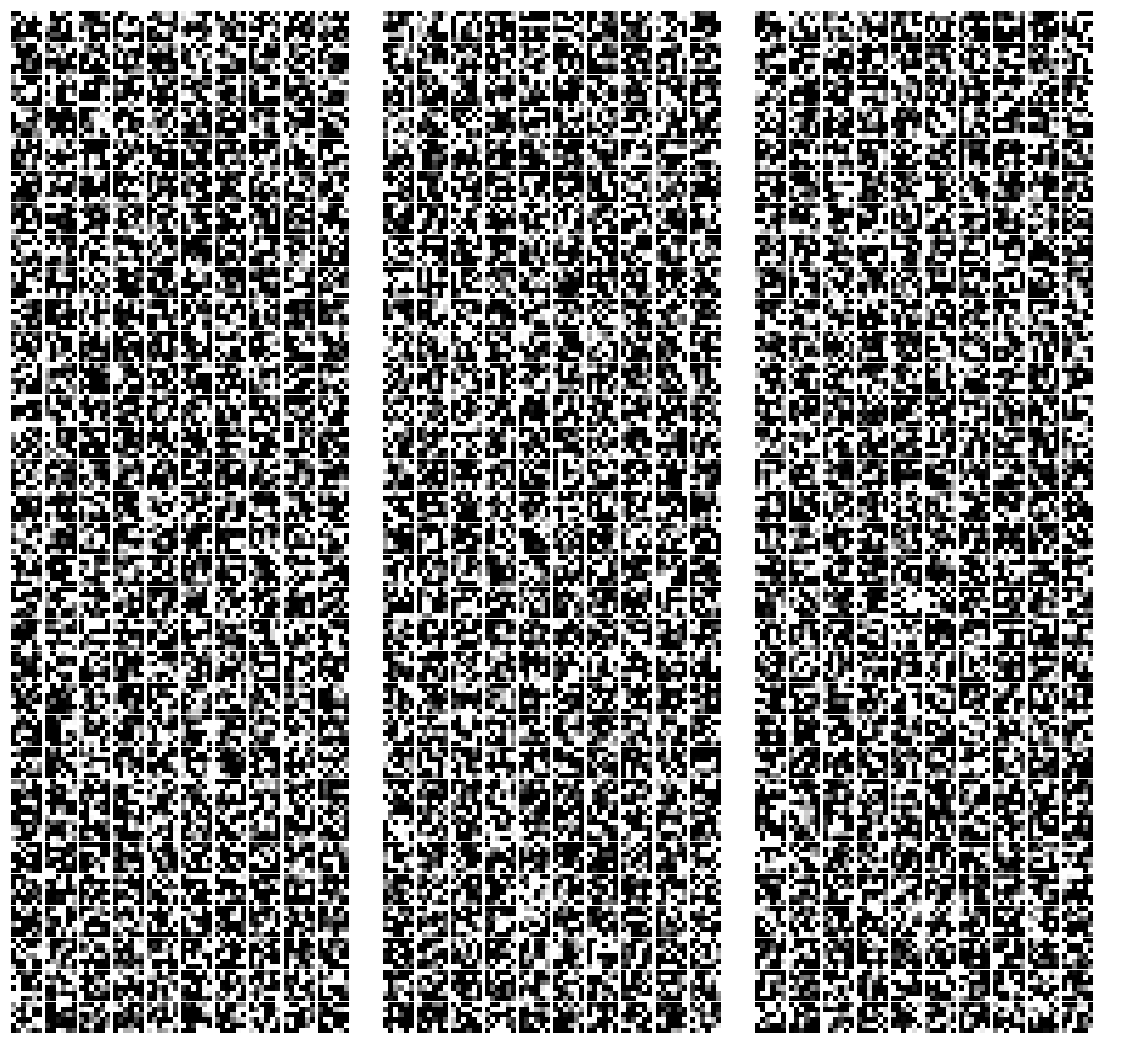

In [3]:
from numpy.random import rand

plt.figure(figsize=(20,20))


K_max = 32
K_min = 0
L_max = 10
L_min = 0

loffset = 1/L_max
koffset = 1/K_max

coppies  = 3
spacing = L_max + L_max * loffset + 1

ax = plt.subplot(111)
plt.setp(ax, 'frame_on', False)
ax.set_ylim([0, (K_max-K_min)+K_max*koffset])
ax.set_xlim([0, ((L_max - L_min)+L_max*loffset + 1)*coppies])
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)


for c in np.arange(0,coppies):
    for k in np.arange(K_min, K_max):    
        for l in np.arange(L_min, L_max):
            da = np.array([np.random.uniform(-1,3,6) for _ in range(6)])
            
            x_start = l + l*loffset + c*spacing 
            x_stop = l+1 + l*loffset + c*spacing
            y_start = k + k*koffset
            y_stop = k+1 + k*koffset
            
            ax.imshow(da,cmap="binary",extent=[x_start,x_stop,y_start,y_stop],vmin=0,vmax=1)
        

       
plt.savefig("/home/erik/Desktop/fast.jpg")



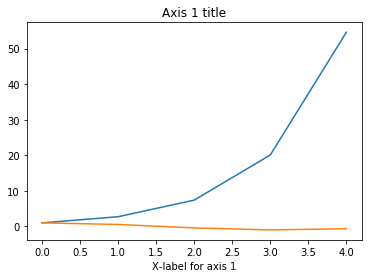

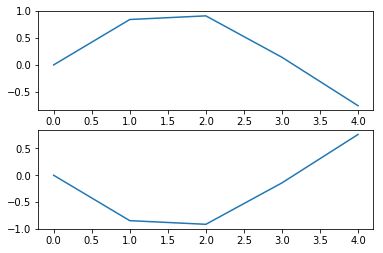

In [59]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
y = np.exp(x)
fig1, ax1 = plt.subplots()
ax1.plot(x, y)
ax1.set_title("Axis 1 title")
ax1.set_xlabel("X-label for axis 1")

z = np.sin(x)
fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) # two axes on figure
ax2.plot(x, z)
ax3.plot(x, -z)

w = np.cos(x)
ax1.plot(x, w)

In [1]:
def plotter3(layerId,data):
    fig,ax = plt.subplots()
    im = ax.imshow(data,cmap="binary",aspect='auto') 
    ax.axis("off")
    fig.colorbar(im)
    return ax
da = np.array([np.random.uniform(-0.1,0.1,6) for _ in range(6)])
print(da)
a = plotter3(1,da)

plt.savefig('/home/erik/Desktop/1.jpg')


NameError: name 'np' is not defined

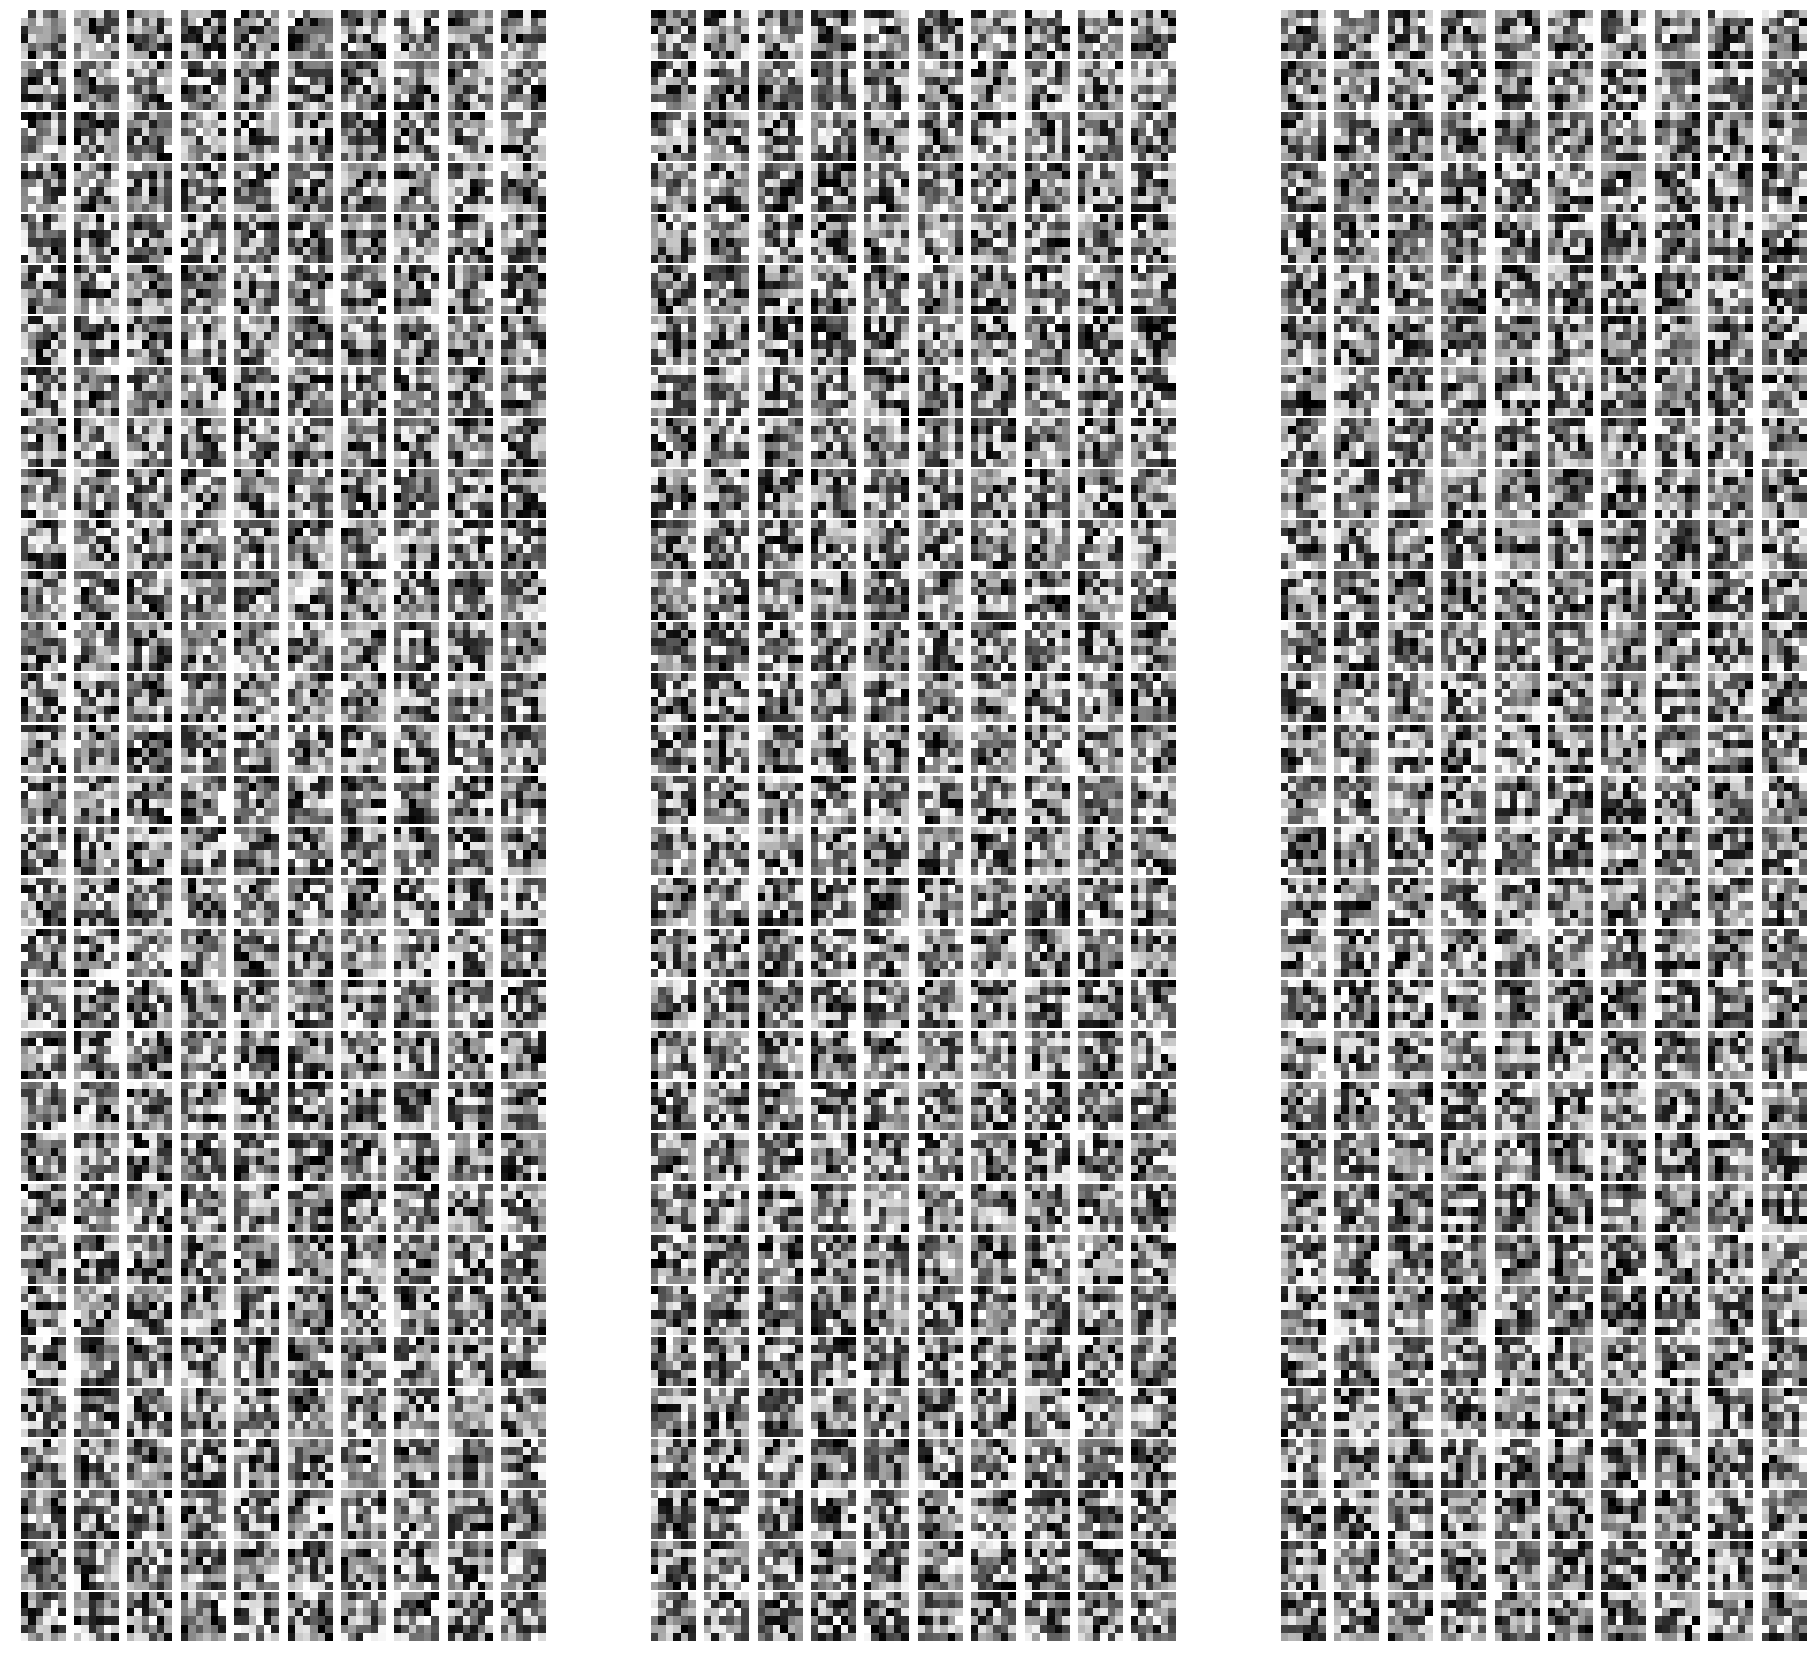

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib import gridspec
#da = np.array([np.random.uniform(-1,3,6) for _ in range(6)])

#imgplot = plt.imshow(da,cmap="binary")

cols = 10
rows = 32
iterations = 3

fig = plt.figure(figsize=(32, 30))



outer_gs = gridspec.GridSpec(1,3)

for k in range(iterations):
    gs = gridspec.GridSpecFromSubplotSpec(rows, cols,
         wspace=0.2, hspace=0.05,subplot_spec=outer_gs[k])
    for i in range(rows):
        for j in range(cols):
            da = np.array([np.random.uniform(-1,3,6) for _ in range(6)])
            ax= plt.subplot(gs[i,j])
            ax.imshow(da,cmap="binary",aspect='auto')        
            ax.axis("off")
#plt.show()
plt.savefig('/home/erik/Desktop/image.jpg')

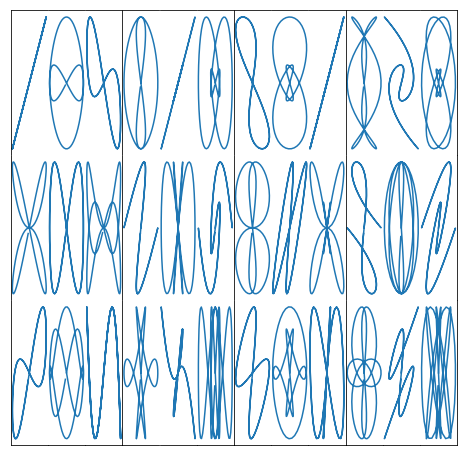

In [72]:
import numpy as np
from itertools import product


def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(1, 4, wspace=0.0, hspace=0.0)

for i in range(4):
    inner_grid = gridspec.GridSpecFromSubplotSpec(
      3, 3, subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0)
    a, b = int(i/4)+1, i % 4+1
    for j, (c, d) in enumerate(product(range(1, 4), repeat=2)):
        ax = plt.Subplot(fig, inner_grid[j])
        ax.plot(*squiggle_xy(a, b, c, d))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

all_axes = fig.get_axes()

# show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()

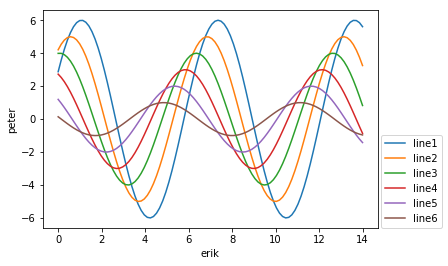

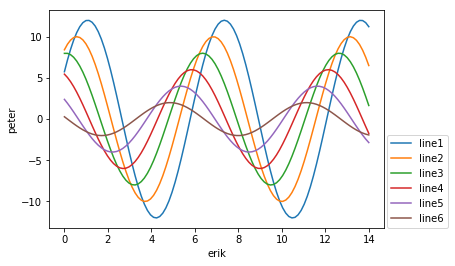

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip,label="line"+str(i))
        plt.xlabel("erik")
        plt.ylabel("peter")
        plt.legend(loc=(1.01,0))
    
    
plt.figure(1)
plt1 = sinplot()

plt.figure(2)
plt2 = sinplot(flip=2)


<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64


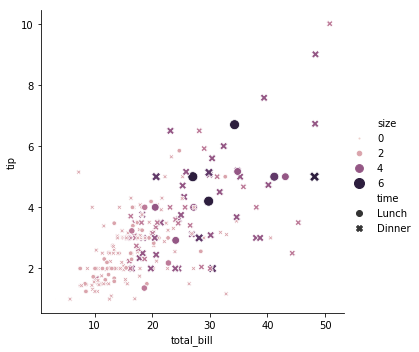

In [3]:


data = sb.load_dataset("tips")
print(type(data))
print(data[:10])
print(data["total_bill"][:10])

sb.relplot(x="total_bill", y="tip",hue="size",style="time",
           size="size",data=data,sizes=(1,100))

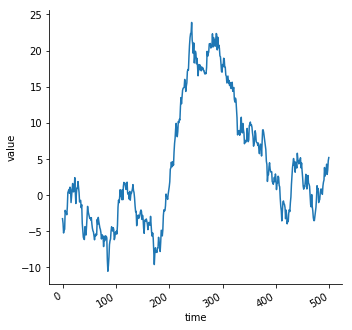

In [4]:
data1 = pd.DataFrame(dict(time=np.arange(500),
                         value = np.random.randn(500).cumsum()))

graph = sb.relplot(x="time",y="value",kind="line",data=data1)
graph.fig.autofmt_xdate()

If X value has multiple measurements seaborn will by default aggregate them and plot the mean and 95% confidence interval

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513
6      s8         18  stim  parietal -0.064408
7      s7         18  stim  parietal -0.060526
8      s6         18  stim  parietal -0.007029
9      s5         18  stim  parietal -0.040557


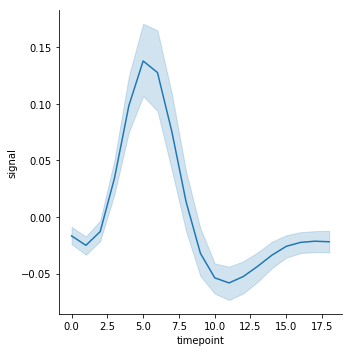

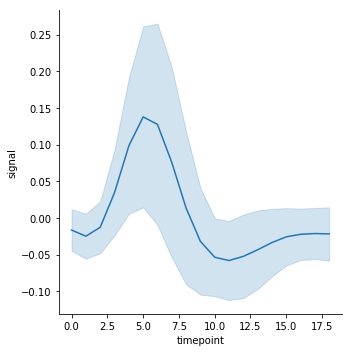

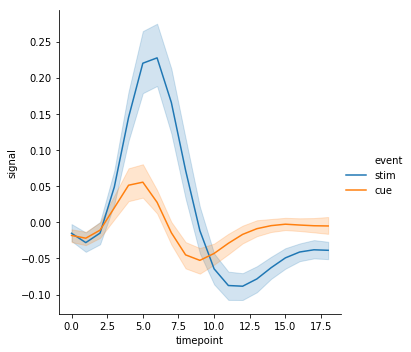

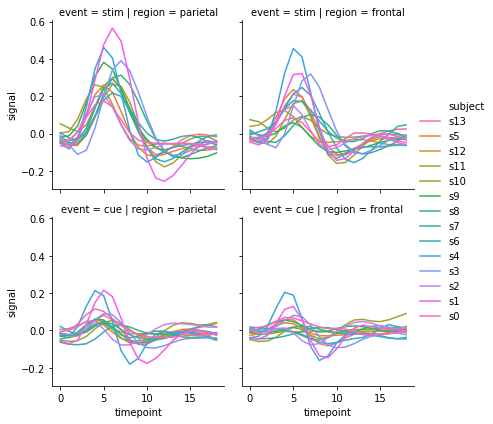

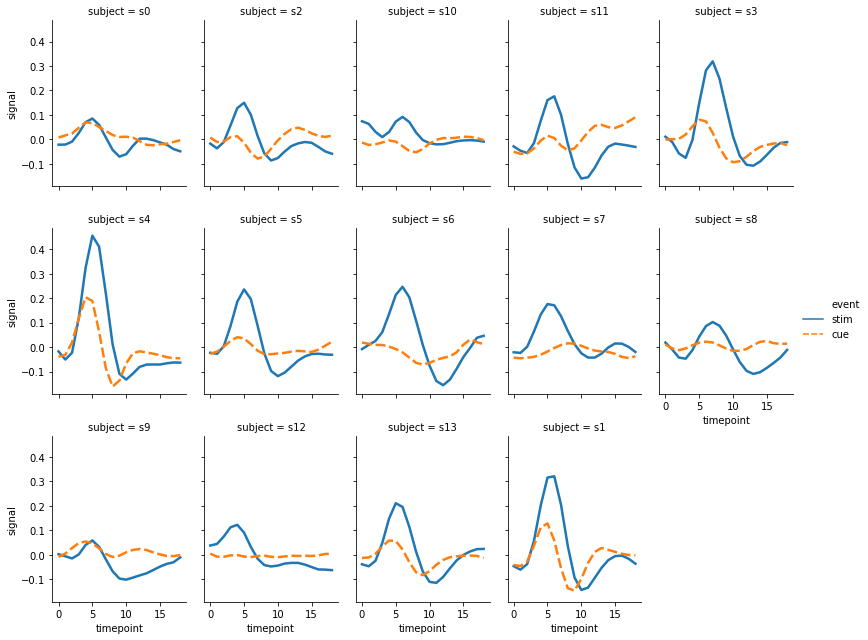

In [5]:
fmri = sb.load_dataset("fmri")
print(fmri[:10])
sb.relplot(x="timepoint", y="signal", kind="line", data=fmri)
sb.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)
sb.relplot(x="timepoint", y="signal", kind="line",hue="event", data=fmri)
sb.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

sb.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

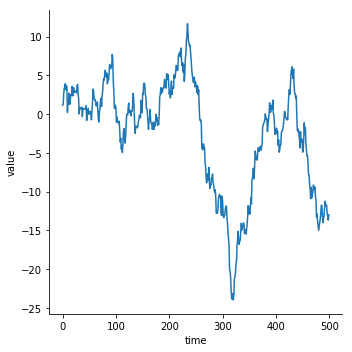

In [6]:
df = pd.DataFrame(dict(time=np.arange(500),
                         value = np.random.randn(500).cumsum(),
                       val2 = np.random.randn(500).cumsum()))

sb.relplot(x='time', y='value', data=df, kind="line")



          0         1         2
0 -0.621565 -0.318493  1.072545
1  2.498788  1.298965 -0.417736
2  2.986459 -0.590407  1.236600
3  1.018198  1.988993 -0.275644
4  1.733542  0.843513 -0.777510
          0         1         2
0 -0.621565 -0.318493  1.072545
1  2.498788  1.298965 -0.417736


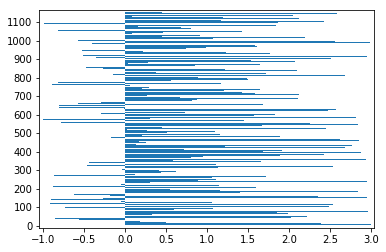

In [155]:
data = np.array([np.random.uniform(-1,3,3) for _ in range(5)])
data = pd.DataFrame(data=data)
print(data)
print(data[:2])




dataset = pd.DataFrame({"capsule":list(range(1152)),"coefficient":np.random.uniform(-1,3,1152)})
plt.barh(dataset["capsule"],dataset["coefficient"]) 
plt.yticks(dataset["capsule"][0::100], dataset["capsule"][0::100])
fig_size = [6,4]
plt.rcParams["figure.figsize"] = fig_size
plt.margins(0.01)
plt.show()



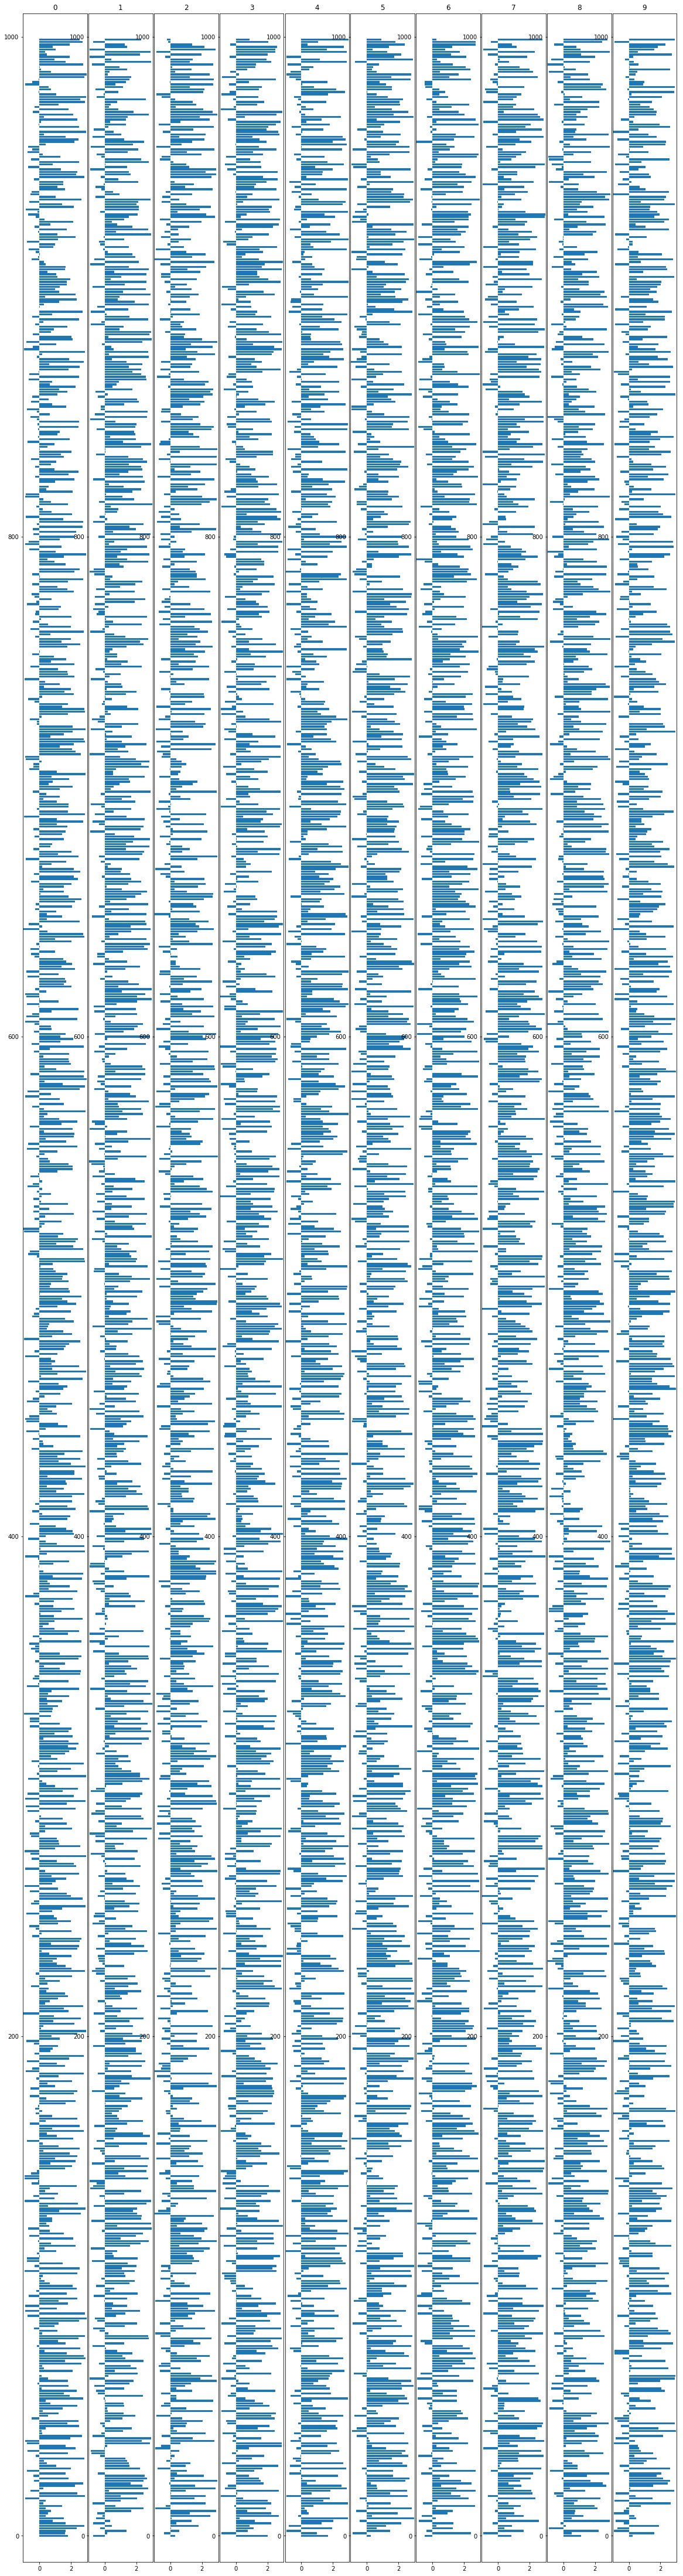

In [15]:
fig, axs = plt.subplots(1,10, figsize=(20, 80), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .70, wspace=.02)

axs = axs.ravel()

for i in range(10):
    axs[i].barh(list(range(1000)),np.random.uniform(-1,3,1000))
    axs[i].set_title(str(i))
    axs[i].margins(0.01)

(<matplotlib.figure.Figure at 0x7fec63387b00>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec63873240>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7fec68177e48>]], dtype=object))

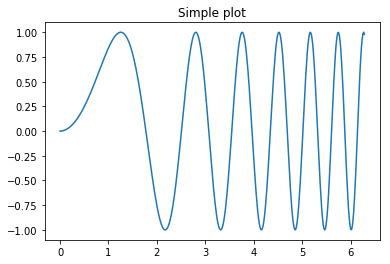

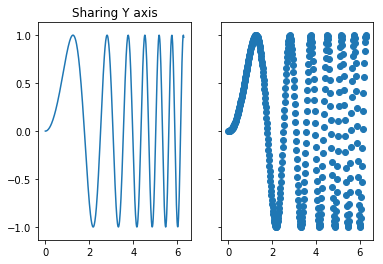

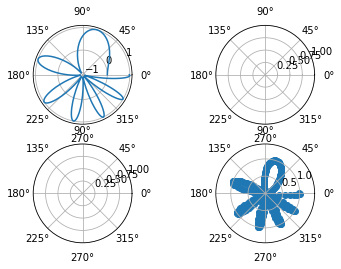

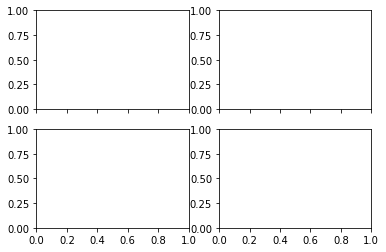

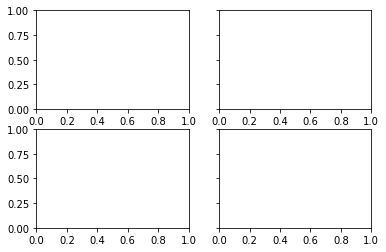

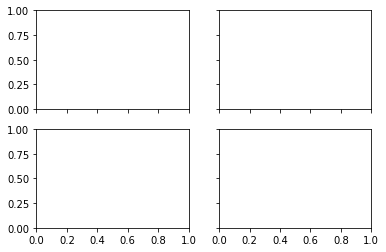

In [136]:
>>> x = np.linspace(0, 2*np.pi, 400)
>>> y = np.sin(x**2)
>>> fig, ax = plt.subplots()
>>> ax.plot(x, y)

>>> ax.set_title('Simple plot')
>>> f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
>>> ax1.plot(x, y)

>>> ax1.set_title('Sharing Y axis')
>>> ax2.scatter(x, y)
>>> fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
>>> axes[0, 0].plot(x, y)
>>> axes[1, 1].scatter(x, y)

plt.subplots(2, 2, sharex='col')

plt.subplots(2, 2, sharey='row')

plt.subplots(2, 2, sharex='all', sharey='all')